# Bonus (Optional)

As you examine the data, you are overcome with a creeping suspicion that the dataset is fake. You surmise that your boss handed you spurious data in order to test the data engineering skills of a new employee. To confirm your hunch, you decide to take the following steps to generate a visualization of the data, with which you will confront your boss.

### Import the SQL database into Pandas.

In [1]:
# Install psycopg2 if needed by unindenting it
# !pip install psycopg2

In [2]:
# Import the various dependencies and setup
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import user_name, password, database

In [3]:
# Create Engine
# database_path
engine = create_engine('postgresql+psycopg2://' + user_name + ':' + password + '@localhost:5432/' + database)
connection = engine.connect()

### Create a histogram to visualize the most common salary ranges for employees.

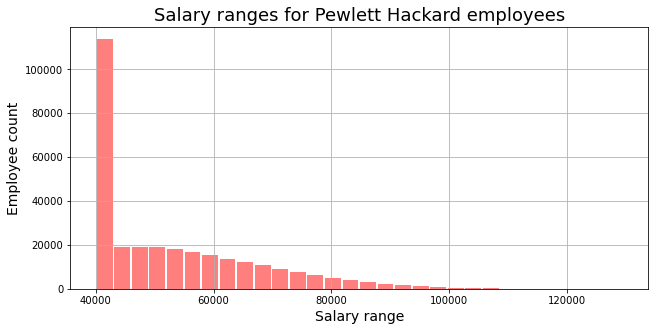

In [4]:
# Create an employee summary Dataframe
employee_salary_df = pd.read_sql("SELECT emp_no, salary FROM salaries", connection)

# Generate a histogram showing the most common salary ranges for employees
# Define the axis
x_axis = employee_salary_df['salary']
bins = 30

plt.figure(figsize=(9.2, 4.7))
plt.hist(x_axis, bins, facecolor = 'red', alpha=0.5, rwidth= 0.9)

# Set the textual properties
plt.title("Salary ranges for Pewlett Hackard employees", fontsize = 18)
plt.xlabel("Salary range", fontsize = 14)
plt.ylabel("Employee count", fontsize = 14)
plt.grid (True)
plt.tight_layout()

### Create a bar chart of average salary by title.

In [5]:
# Create an average salary by title summary Dataframe
salary_by_title = pd.read_sql("SELECT titles.title AS title, ROUND(AVG (salaries.salary),2) AS average_salary\
                    FROM titles\
                    JOIN salaries ON titles.emp_no = salaries.emp_no\
                    GROUP BY title\
                    ORDER BY title ASC;", connection)
salary_by_title

,title,average_salary
0,Assistant Engineer,48493.20
1,Engineer,48539.78
2,Manager,51531.04
3,Senior Engineer,48506.75
4,Senior Staff,58503.29
5,Staff,58465.27
6,Technique Leader,48580.51


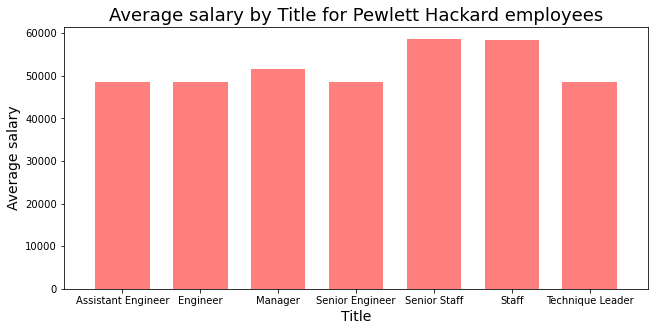

In [6]:
# Generate a bar plot showing the average salary by title

# Define the axis
x_axis = (salary_by_title["title"])
y_axis = (salary_by_title["average_salary"])

# Configure the plot and ticks
plt.figure(figsize=(9.2, 4.7))
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center", width=0.7)
tick_locations = [value for value in x_axis]

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(salary_by_title["average_salary"])*1.05)

# Set the textual properties
plt.title("Average salary by Title for Pewlett Hackard employees", fontsize = 18)
plt.xlabel("Title", fontsize = 14)
plt.ylabel("Average salary", fontsize = 14)
plt.tight_layout()

### Epilogue

Evidence in hand, you march into your boss's office and present the visualization. With a sly grin, your boss thanks you for your work. On your way out of the office, you hear the words, "Search your ID number." You look down at your badge to see that your employee ID number is 499942.

In [7]:
epilogue = pd.read_sql("SELECT emp_no, first_name, last_name FROM employees WHERE emp_no = '499942'", connection)
epilogue.head()

,emp_no,first_name,last_name
0,499942,Odill,Rodrigues
